In [1]:
import fiftyone

In [32]:
dataset = fiftyone.zoo.load_zoo_dataset(
              "open-images-v6",
              split="train", #train, validation, test
              label_types=["segmentations"],
              classes=["Mobile phone"],
              max_samples=10000,
          )

Only found 3781 (<10000) samples matching your requirements
Necessary images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'open-images-v6-train-10000'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [1]:
import pandas as pd

df = pd.read_csv("../../../fiftyone/open-images-v6/train/labels/segmentations.csv")
df.head()

,MaskPath,ImageID,LabelName,BoxID,BoxXMin,BoxXMax,BoxYMin,BoxYMax,PredictedIoU,Clicks
0,677c122b0eaa5d16_m04yx4_9a041d52.png,677c122b0eaa5d16,/m/04yx4,9a041d52,0.887500,0.960938,0.454167,0.720833,0.86864,0.95498 0.65197 1;0.89370 0.56579 1;0.94701 0....
1,05529ae018130c68_m09j2d_b1115fd0.png,05529ae018130c68,/m/09j2d,b1115fd0,0.086875,0.254375,0.504708,0.790960,0.80250,0.16388 0.50114 1;0.25069 0.75425 1;0.13478 0....
2,96e7ee70b428a54e_m04yx4_05580497.png,96e7ee70b428a54e,/m/04yx4,05580497,0.456250,0.603125,0.222013,0.903104,0.55850,0.52271 0.46625 0;0.52695 0.70150 0;0.59151 0....
3,76084f166740d78a_m09j2d_557dfcf5.png,76084f166740d78a,/m/09j2d,557dfcf5,0.018750,0.145625,0.313333,0.754167,0.62394,0.08756 0.34082 0;0.03971 0.34195 1;0.06705 0....
4,ebaccfc70c721055_m02p0tk3_b39109c0.png,ebaccfc70c721055,/m/02p0tk3,b39109c0,0.097500,0.212500,0.291667,0.930833,0.84223,0.19847 0.85413 1;0.18916 0.34751 1;0.18636 0....


In [34]:
rows.iloc[idx].iteritems()

In [54]:
import cv2
import glob
import os
from PIL import Image
import numpy as np

##check
check_true = 0
check_false = 0
for image_path in image_paths:
    # image_path = image_paths[0]

    img_id = os.path.basename(image_path).replace('.jpg','')
    select = df[(df['ImageID'] == img_id) & (df['LabelName'] == '/m/050k8')]
    
    rows = select[["MaskPath", "BoxXMin", "BoxYMin", "BoxXMax", "BoxYMax"]]
    

    for idx in range(len(rows)):
        mask_file_name = rows.iloc[idx]["MaskPath"]
        prefix = mask_file_name[0]

        bbox = [float(v) for v in rows.iloc[idx].values[1:]]
        
        mask_path = os.path.join(os.path.dirname(image_path).replace('/data', f'/labels/masks/{prefix}'), mask_file_name) 

        img = cv2.imread(image_path)
        mask = cv2.imread(mask_path)

        if img is None or mask is None:
            check_false+=1
        else:
            check_true+=1
        

        # print(img.shape, mask.shape)
        if img.shape != mask.shape:
            h, w = img.shape[:2]
            mask = cv2.resize(mask, dsize=(w,h))
            
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(mask, 127, 255, 0)

        # display(Image.fromarray(img))
        # display(Image.fromarray(mask))
        
        cv2.imwrite(os.path.join("image", os.path.basename(image_path)), img)
        cv2.imwrite(os.path.join("mask", os.path.basename(mask_path)), mask)         
        
        
        # bbox = int(bbox[0]*w), int(bbox[1]*h), int(bbox[2]*w), int(bbox[3]*h)

        # fg = cv2.bitwise_and(img, img, mask=mask)
        # cv2.rectangle(fg, bbox[0:2], bbox[2:4], (255,0,0), 3)
        
        # display(Image.fromarray(fg))

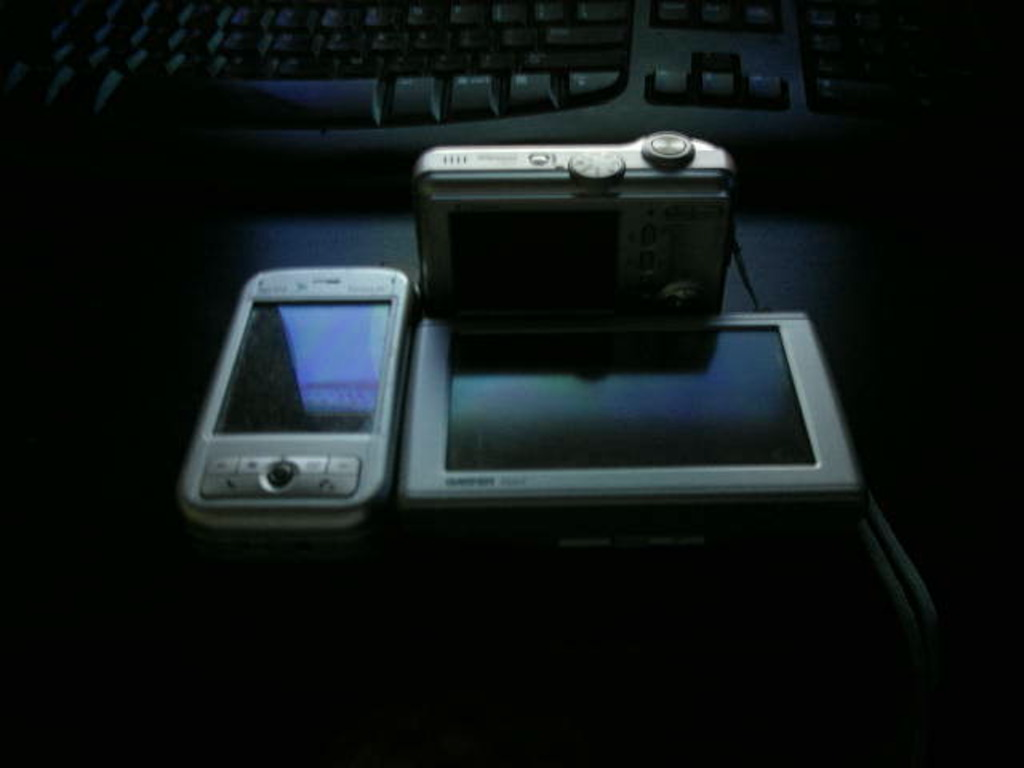

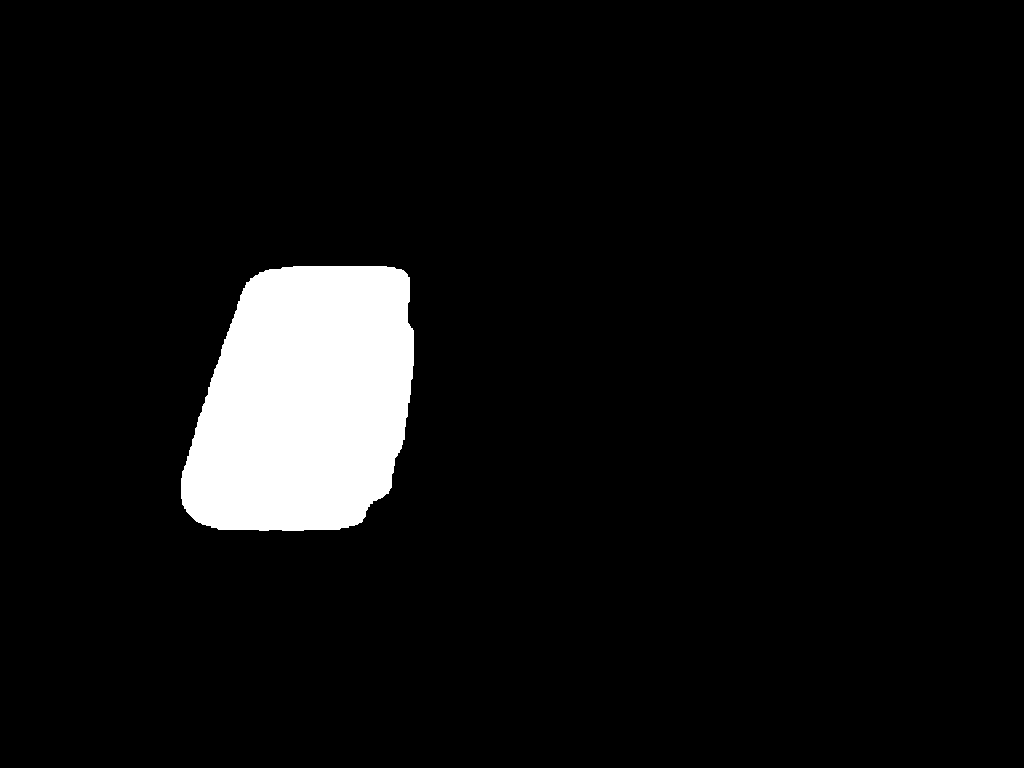

In [10]:
display(Image.fromarray(img))
display(Image.fromarray(mask))

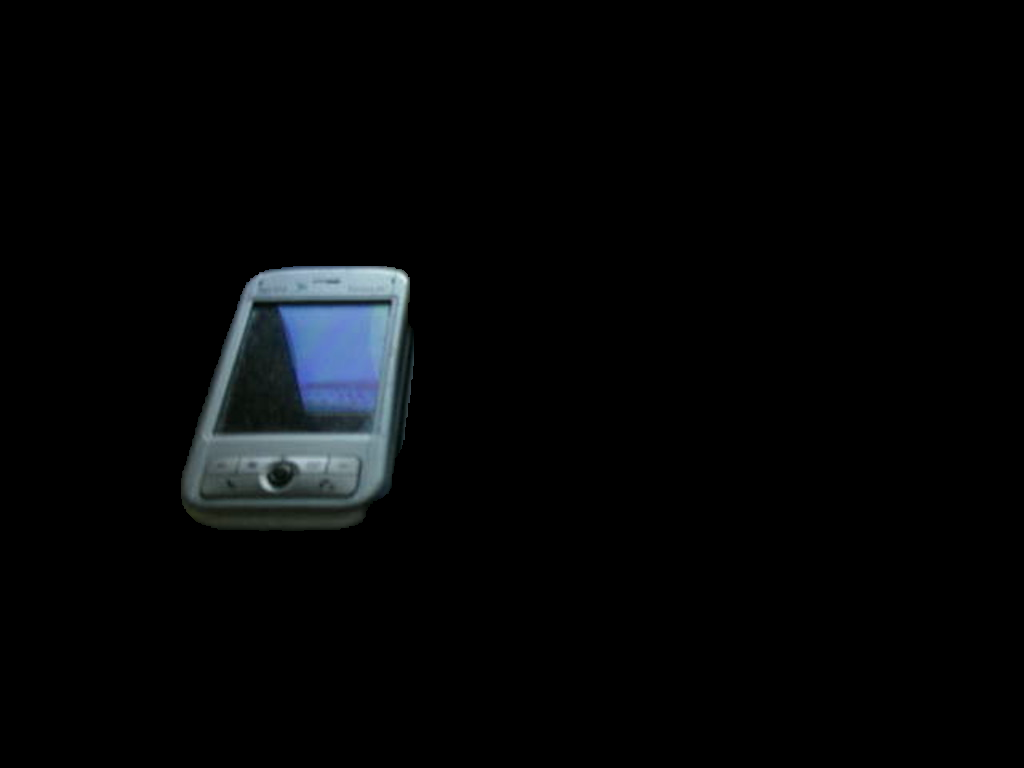

In [12]:
display(Image.fromarray(fg))

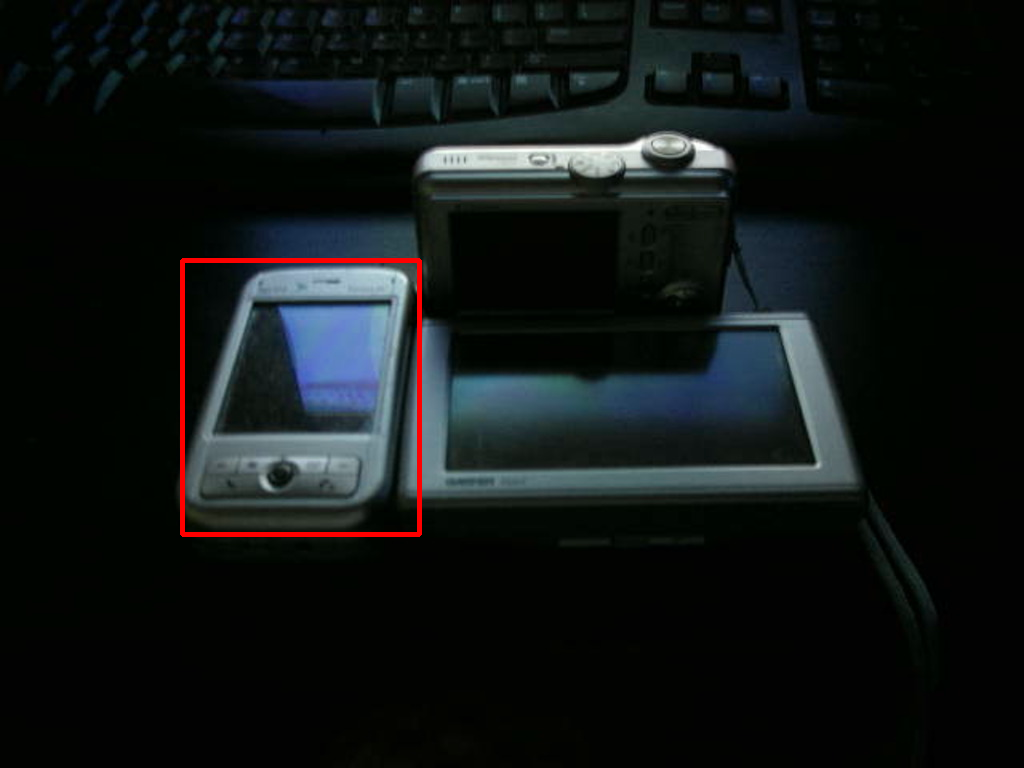

In [13]:
display(Image.fromarray(img))